# 0. Load Data

In [5]:
from function import *
import pandas as pd
import pandas as pd
import geopandas as gpd
from typing import Sequence
import pickle

# # # Calculate point density for clustering
# # xy_coords = np.vstack([df['lon'], df['lat']])
# # z = gaussian_kde(xy_coords)(xy_coords)
# # Save the point density data to pickle for later use
# density_data = {
#     'coordinates': xy_coords,
#     'density': z
# }
# Load the point density data from pickle
with open('data/point_density.pkl', 'rb') as f:
    density_data = pickle.load(f)
    
xy_coords = density_data['coordinates'] 
z = density_data['density']

abandon_2d_variable = [
    "current_abandonment",
    "recultivation", 
    "abandonment_duration",
    "abandonment_year"
]
fea_3d_variable = [
    'GDPpc',
    'GDPtot',   
    'GURdist',
    'Population',
    'gdmp',
    'rsds',
    'tas',
    'wind'
]
fea_2d_variable = [
    'DEM',
    'Powerdist',
    'PrimaryRoad',
    'SecondaryRoad',
    'Slope',
    'TertiaryRoad'
]
PATHS = {
    'abandonment': r"D:\xarray\merged_chunk_2\*.nc",
    'feature':     "D:/xarray/aligned2/Feature_all/*.nc",
    'csv':         "aligned_for_training0519.csv",
    'prediction':  "",
    'prediction_us': "",
    'test_output': "positive_samples_test_500.csv",
    'output':      "positive_samples_full_with_features.csv",
    'CN_sheng': r'data\sheng2022.shp',
    'World_shp': r'data\main_ADM_0.shp', 
    'us_abandon': r'data\us_abandon_clean.csv',
    'us_pv_embedding': r'data\training_embedding.csv'
}

ZERO_COLS = [
     'GDPpc', 'GDPtot', 'GURdist', 'Population',
    'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad', 'gdmp'
]
YEARS = [2018, 2020]

NUMERIC_FEATURES = [
    'lat','lon','GDPpc', 'GDPtot', 'GURdist', 'DEM','Slope',
    'Population','Powerdist','PrimaryRoad','SecondaryRoad','TertiaryRoad',
    'gdmp','rsds','tas','wind'
]
CAT_COLS = ['landcover']

ABANDON_COLS = ['abandonment_year','abandonment_duration', 'current_abandonment']

NONE_ABANDON_COLS = ['recultivation']

time=['2018-01-01','2020-01-01']




import pandas as pd

df=pd.read_csv('data/4.data_prediction_net_benefit.csv')
df

,Unnamed: 0,time,lat,lon,abandonment_year,abandonment_duration,current_abandonment,landcover,DEM,GDPpc,...,env_scores,I,T_amb_C,T_cell,PR,PVPOT,area_m2,E_yr_per_m2,E_yr_pixel,carbon_emission (t)/yr
0,2094,2020-01-01,25.004168,-107.545830,2018.0,6.0,1,2.0,128.7500,22847.0,...,0.305240,237.914965,25.048451,32.422900,0.962885,0.229085,778152.929849,272.922551,2.123755e+08,74756.169816
1,4586,2020-01-01,25.012500,-107.612500,2017.0,7.0,1,2.0,96.3125,11575.0,...,0.264706,236.213206,25.124969,32.496307,0.962518,0.227360,778100.144389,270.867100,2.107617e+08,74188.128759
2,4601,2020-01-01,25.012500,-107.487500,2017.0,7.0,1,2.0,176.3750,22847.0,...,0.293005,240.578588,24.871505,32.446806,0.962766,0.231621,778100.144389,275.943848,2.147119e+08,75578.605793
3,9586,2020-01-01,25.029167,-107.612500,2017.0,7.0,1,2.0,77.1250,11575.0,...,0.182346,238.517188,25.247247,32.653958,0.961730,0.229389,777994.505085,273.285100,2.126143e+08,74840.235643
4,9850,2020-01-01,25.029167,-105.412500,2017.0,7.0,1,2.0,1730.6250,10594.0,...,0.223332,261.403194,18.191922,25.823668,0.995882,0.260327,777994.505085,310.142755,2.412894e+08,84933.854311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70307,20522499,2020-01-01,48.187500,-65.837500,1998.0,26.0,1,3.0,46.5000,29640.0,...,0.307058,149.853611,3.224994,6.500221,1.092499,0.163715,572441.665873,195.043389,1.116510e+08,39301.138738
70308,20625641,2020-01-01,48.579166,-67.987500,1998.0,26.0,1,2.0,228.4375,33888.0,...,0.309734,150.538993,2.483033,4.403099,1.102985,0.166042,568053.646581,197.816008,1.123701e+08,39554.276764
70309,20669107,2020-01-01,48.745834,-72.437500,2012.0,12.0,1,2.0,105.2500,42697.0,...,0.306415,145.019954,2.508194,5.253224,1.098734,0.159338,566178.323096,189.829320,1.074772e+08,37831.990663
70310,20673507,2020-01-01,48.762500,-72.437500,2009.0,15.0,1,2.0,106.8125,43202.0,...,0.309188,144.985972,2.458607,5.025687,1.099872,0.159466,565990.536004,189.981352,1.075276e+08,37849.731809


# 1. Emission Map

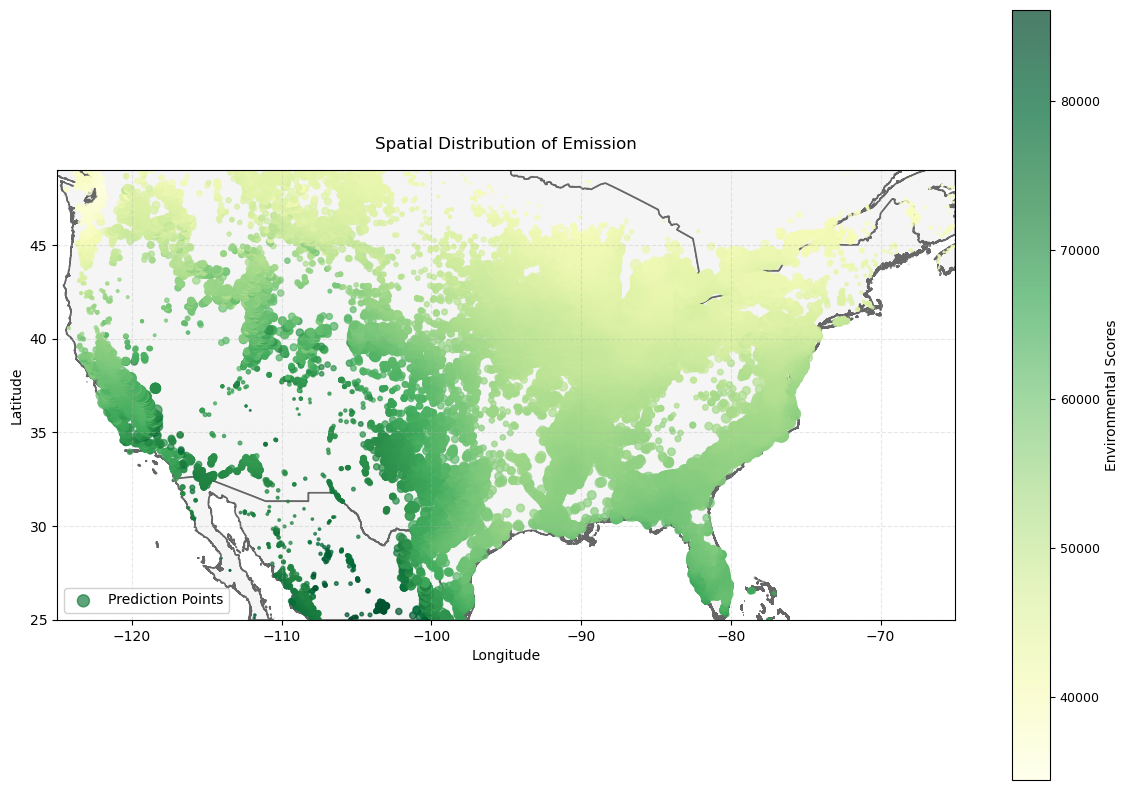

In [6]:
import geopandas as gpd
from function import *
from FeatureInsight import struct_Investigation,univar_dis,bivar_dis
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import box
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde

# Create figure and set size
fig, ax = plt.subplots(figsize=(12,8))

# Define USA mainland bounds
usa_bounds_main = {
        'lon_min': -125,  # Westernmost point (Washington state)
        'lon_max': -65,   # Easternmost point (Maine)
        'lat_min': 25,    # Southernmost point (Florida)
        'lat_max': 49     # Northernmost point (Canada border)
    }
bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])

world = gpd.read_file(PATHS['World_shp'])
us_main = world.clip(bbox)

# Set plot bounds to USA mainland
ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])

# Draw USA mainland base map with more prominent borders
us_main.plot(ax=ax, color='#f5f5f5', edgecolor='#666666', linewidth=1.2)

# Create YlGn colormap for prediction points
pred_colors = plt.cm.YlGn(np.linspace(0, 1, 256))
pred_cmap = ListedColormap(pred_colors)

# Create gradient colormap for training points (orange)
train_colors = np.array(['#fff2e6', '#ffd9b3', '#ffbf80', '#ffa64d', '#ff8c1a'])  # Light to dark orange
rgb_train_colors = np.linspace(plt.matplotlib.colors.to_rgb(train_colors[0]), 
                        plt.matplotlib.colors.to_rgb(train_colors[-1]), 
                        256)
train_cmap = ListedColormap(rgb_train_colors)



# Plot prediction points with size based on density
scatter = ax.scatter(df['lon'], df['lat'],
                    c=df['carbon_emission (t)/yr'],
                    s=150 * z/z.max(),  # Increased size multiplier from 100 to 150
                    cmap=pred_cmap,
                    alpha=0.7,
                    label='Prediction Points')

# # Plot training points with smaller size
# train_scatter = ax.scatter(us_df_embedding_fill['lon'], us_df_embedding_fill['lat'],
#                           alpha=0.4, s=8, c='orange',  # Reduced size from 15 to 8
#                           label='Training Points')

# Add colorbar
cbar = plt.colorbar(scatter, label='Environmental Scores', ax=ax)
cbar.ax.tick_params(labelsize=9)

# Set chart style
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.set_title('Spatial Distribution of Emission', 
             fontsize=12, pad=15)
ax.legend(frameon=True, facecolor='white', framealpha=0.9)
ax.grid(True, linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# 2